# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 5: Multi Assets Algorithmic Trading Backtesting with Backtrader

For this tutorial we need matplotlib=3.2.2 because backtrader only works with this version of matplotlib. However, this version of matplotlib give us an error in plot_pie function.

## 1. Downloading the data:

In [253]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2010-01-01'
end = '2023-05-25'

# Tickers of assets
assets = ['^KS200',
          '229200.KS',
          '143850.KS',
          '195930.KS',
          '238720.KS',
          '192090.KS',
          '148070.KS',
          '136340.KS',
          '182490.KS',
          '280940.KS',
          '130680.KS',
          '114800.KS',
          '138230.KS',
          '139660.KS',
          '130730.KS',
          'SPY']

lables = ['KOSPI',
    'KOSDAQ',
    'S&P500',
    'STOXX50',
    'Nikkei225',
    'CSI300',
    '국채10년',
    '우량회사채',
    '해외채권',
    '금',
    'WTI',
    'KOSPI-Short',
    'US-Long',
    'US-Short',
    'MMF',
    'SPY']

# Downloading data
prices = yf.download(assets, start=start, end=end)
display(prices.head())
prices = prices.dropna()
# prices['Adj Close'].columns = lables
# prices['Close'].columns = lables
# prices['High'].columns = lables
# prices['Low'].columns = lables
# prices['Open'].columns = lables
# prices['Volume'].columns = lables

[*********************100%***********************]  16 of 16 completed


Adj Close                                                     
              114800.KS 130680.KS 130730.KS 136340.KS 138230.KS 139660.KS   
Date                                                                        
2010-01-04 938500.0000%       NaN       NaN       NaN       NaN       NaN  \
2010-01-05 942000.0000%       NaN       NaN       NaN       NaN       NaN   
2010-01-06 933000.0000%       NaN       NaN       NaN       NaN       NaN   
2010-01-07 948000.0000%       NaN       NaN       NaN       NaN       NaN   
2010-01-08 943000.0000%       NaN       NaN       NaN       NaN       NaN   

                                                    ...    Volume             
           143850.KS 148070.KS 182490.KS 192090.KS  ... 143850.KS 148070.KS   
Date                                                ...                       
2010-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN  \
2010-01-05       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-08       NaN       NaN       NaN       NaN  ...       NaN       NaN   

                                                                         
           182490.KS 192090.KS 195930.KS 229200.KS 238720.KS 280940.KS   
Date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN  \
2010-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-08       NaN       NaN       NaN       NaN       NaN       NaN   

                                             
                         SPY         ^KS200  
Date                                         
2010-01-04 11894460000.0000%  8600000.0000%  
2010-01-05 11157990000.0000% 15320000.0000%  
2010-01-06 11607440000.0000% 17060000.0000%  
2010-01-07 13109110000.0000% 18340000.0000%  
2010-01-08 12640280000.0000% 15720000.0000%  

[5 rows x 96 columns]

In [254]:
############################################################
# Showing data
############################################################
display(prices.head())

Adj Close                                              
              114800.KS    130680.KS      130730.KS      136340.KS   
Date                                                                 
2017-11-09 581500.0000% 416000.0000% 10032551.5625% 10009006.2500%  \
2017-11-10 583500.0000% 417500.0000% 10032058.5938% 10008515.6250%   
2017-11-13 586000.0000% 416500.0000% 10032551.5625%  9998707.0312%   
2017-11-14 586500.0000% 414000.0000% 10032058.5938%  9997235.9375%   
2017-11-15 589000.0000% 402000.0000% 10033044.5312%  9999688.2812%   

                                                                      
               138230.KS     139660.KS     143850.KS      148070.KS   
Date                                                                  
2017-11-09 1141787.5977% 1116500.0000% 3076500.0000% 11378895.3125%  \
2017-11-10 1143283.3984% 1116000.0000% 3070000.0000% 11377906.2500%   
2017-11-13 1147272.1680% 1112500.0000% 3062500.0000% 11336366.4062%   
2017-11-14 1144779.1992% 1115000.0000% 3059000.0000% 11322519.5312%   
2017-11-15 1138795.9961% 1120000.0000% 3056500.0000% 11338839.0625%   

                                       ...       Volume                
               182490.KS    192090.KS  ...    143850.KS    148070.KS   
Date                                   ...                             
2017-11-09 1109000.0000% 898381.3477%  ... 228700.0000% 805200.0000%  \
2017-11-10 1108000.0000% 913222.4609%  ... 851100.0000%      0.0000%   
2017-11-13 1108000.0000% 916685.3516%  ... 103300.0000%  64000.0000%   
2017-11-14 1104000.0000% 913222.4609%  ... 118500.0000%  30300.0000%   
2017-11-15 1104500.0000% 900854.8828%  ... 549900.0000%  28800.0000%   

                                                                         
               182490.KS      192090.KS      195930.KS       229200.KS   
Date                                                                     
2017-11-09 6788200.0000% 67005200.0000%  1028300.0000% 119541400.0000%  \
2017-11-10 1553000.0000% 83855900.0000%  3090300.0000%  93532400.0000%   
2017-11-13 1779300.0000% 69167400.0000%  2005700.0000% 323616000.0000%   
2017-11-14 4083200.0000% 50831800.0000%  1664100.0000% 478383800.0000%   
2017-11-15 1237100.0000% 61969600.0000% 13615700.0000% 456272500.0000%   

                                                                    
              238720.KS  280940.KS              SPY         ^KS200  
Date                                                                
2017-11-09 442500.0000% 1000.0000% 9508550000.0000% 10900000.0000%  
2017-11-10 517400.0000%  100.0000% 5998470000.0000%  8620000.0000%  
2017-11-13 233300.0000%  500.0000% 5022860000.0000%  9150000.0000%  
2017-11-14  34400.0000% 1000.0000% 6131520000.0000%  9420000.0000%  
2017-11-15 157600.0000%    0.0000% 8081150000.0000% 11260000.0000%  

[5 rows x 96 columns]

## 2. Building the Backtest Function with Backtrader

### 2.1 Defining Backtest Function

In [255]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.0015) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.000, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        cerebro.plot(iplot=False, start=start, end=end)
    return (results[0].analyzers.drawdown.get_analysis()['max']['drawdown'],
            results[0].analyzers.returns.get_analysis()['rnorm100'],
            results[0].analyzers.sharperatio.get_analysis()['sharperatio'])

### 2.2 Building Data Feeds for Backtesting

In [256]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != 'SPY':
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))

# Creating Benchmark bt.feeds        
prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), 'SPY')].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

,Close,High,Low,Open,Volume
Date,,,,,
2017-11-09,25817.0013%,25839.0015%,25635.9985%,25773.0011%,9508550000.0000%
2017-11-10,25808.9996%,25829.0009%,25736.9995%,25773.0011%,5998470000.0000%
2017-11-13,25832.9987%,25858.9996%,25726.9989%,25730.9998%,5022860000.0000%
2017-11-14,25773.0011%,25785.0006%,25651.9989%,25741.0004%,6131520000.0000%
2017-11-15,25644.0002%,25722.0001%,25563.0005%,25661.9995%,8081150000.0000%


## 3. Building Strategies with Backtrader

### 3.1 Buy and Hold SPY

In [257]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= 300:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

If you have an error related to 'warnings' modules when you try to plot, you must modify the 'locator.py' file from backtrader library following the instructions in this __[link](https://community.backtrader.com/topic/981/importerror-cannot-import-name-min_per_hour-when-trying-to-plot/8)__.

In [258]:
prices.shape[0]

1305

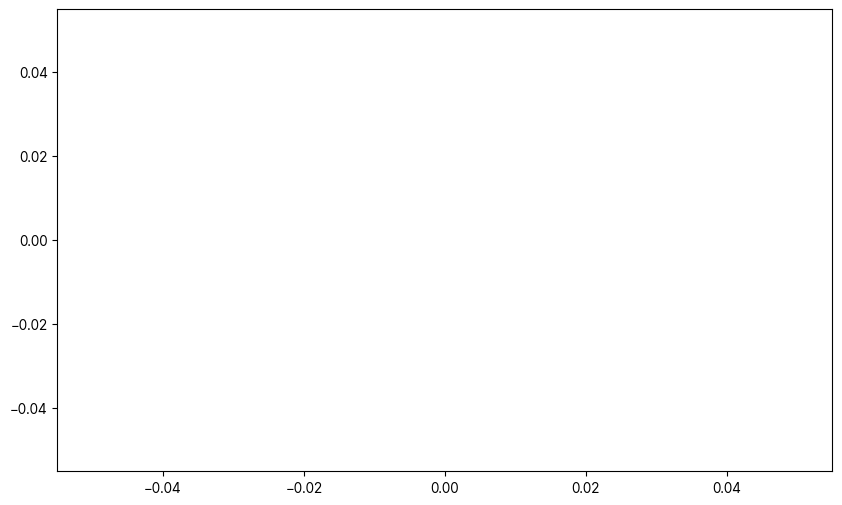

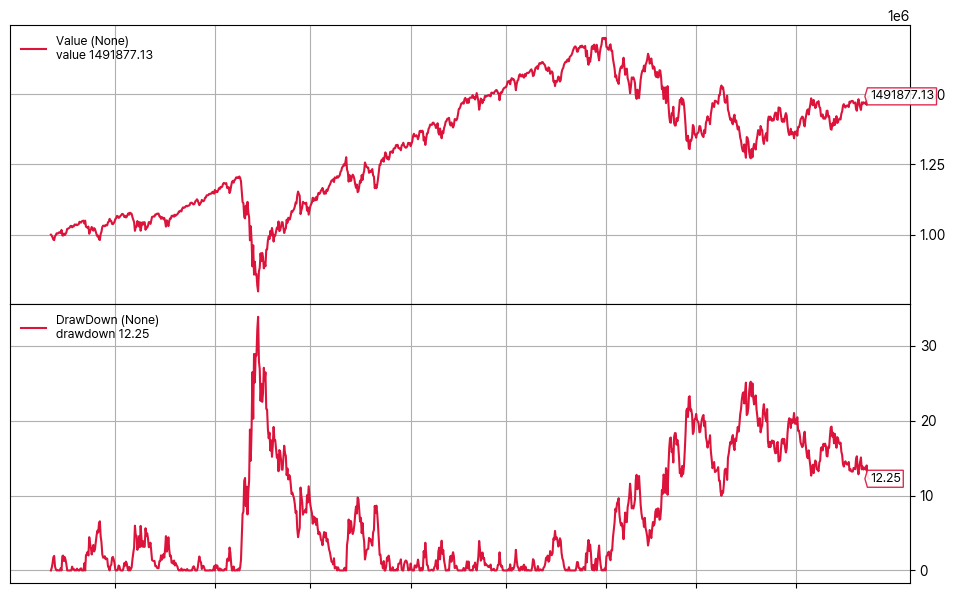

In [259]:
############################################################
# Run the backtest for the selected period
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.rc('font', family='Pretendard')
plt.plot() # We need to do this to avoid errors in inline plot

start = 300
end = prices.shape[0] - 1

dd, cagr, sharpe = backtest([benchmark],
                            BuyAndHold,
                            start=start,
                            end=end,
                            plot=True)

In [260]:
############################################################
# Show Buy and Hold Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 33.88%
CAGR: 7.80%
Sharpe: 0.478


### 3.2 Rebalancing Quarterly using Riskfolio-Lib

In [261]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=['SPY']).dropna()
returns = data.pct_change().dropna()
returns.columns = lables[:-1]
display(returns.head())

,KOSPI,KOSDAQ,S&P500,STOXX50,Nikkei225,CSI300,국채10년,우량회사채,해외채권,금,WTI,KOSPI-Short,US-Long,US-Short,MMF
Date,,,,,,,,,,,,,,,
2017-11-10,0.3439%,0.3606%,-0.0049%,-0.0049%,0.1310%,-0.0448%,-0.2113%,-0.0087%,-0.0902%,1.6520%,-0.9583%,1.9814%,-0.7950%,-0.3014%,-0.0310%
2017-11-13,0.4284%,-0.2395%,0.0049%,-0.0980%,0.3489%,-0.3136%,-0.2443%,-0.3651%,0.0000%,0.3792%,-0.3366%,4.0048%,-1.3937%,0.6549%,0.0930%
2017-11-14,0.0853%,-0.6002%,-0.0049%,-0.0147%,-0.2173%,0.2247%,-0.1143%,-0.1221%,-0.3610%,-0.3778%,-0.8020%,3.8506%,-0.1060%,-0.1502%,-0.2322%
2017-11-15,0.4263%,-2.8986%,0.0098%,0.0245%,-0.5227%,0.4484%,-0.0817%,0.1441%,0.0453%,-1.3543%,-0.7660%,2.6799%,-1.4149%,-0.2005%,-0.5005%
2017-11-16,-0.5093%,0.7463%,-0.0049%,0.0736%,-0.9632%,1.1607%,0.0000%,0.3358%,-0.2263%,-0.1098%,0.4288%,1.8949%,1.2558%,0.3014%,0.8501%


In [262]:
############################################################
# Selecting Dates for Rebalancing
############################################################

# Selecting last day of month of available data
index = returns.groupby([returns.index.year, returns.index.month]).tail(1).index
index_2 = returns.index

# Quarterly Dates
index = [x for x in index if float(x.month) % 3.0 == 0 ] 

# Dates where the strategy will be backtested
index_ = [index_2.get_loc(x) for x in index if index_2.get_loc(x) > 1000]

In [263]:
empty_list = [''] * 27

In [264]:
############################################################
# Building Constraints
############################################################

asset_classes = {'Assets': ['KOSPI', 'KOSDAQ',
                            'S&P500', 'STOXX50', 'Nikkei225', 'CSI300',
                            '국채10년', '우량회사채',
                            '해외채권',
                            '금', 'WTI',
                            'KOSPI-Short',
                            'US-Long', 'US-Short',
                            'MMF'],

                 'Industry': ['DS','DS',
                              'FS', 'FS', 'FS', 'FS',
                              'Bond', 'Bond',
                              'Bond',
                              'COM', 'COM',
                              'Inverse',
                              'FX', 'FX',
                              'Cash'],
                }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False, False,
                            False, False, False, False, False,
                            False, False, False,
                            False, False,
                            
                            False, False,
                            False, False,
                            False, False,
                            False, False,
                            False,
                            False,
                            False,],

               'Type': ['Assets', 'Assets', 'Assets', 'Assets', 'Assets', 'Assets',
                        'Assets', 'Assets', 'Assets', 'Assets', 'Assets',
                        'Assets', 'Assets', 'Assets',
                        'Assets', 'Assets', #자산

                        'Classes', 'Classes',
                        'Classes', 'Classes',
                        'Classes', 'Classes',
                        'Classes', 'Classes',
                        'Classes',
                        'Classes',
                        'Classes'],

               'Set': ['', '', '', '', '', '', # 6
                       '', '', '', '', '', # 5
                       '', '', '', '', '', # 5

                       'Industry', 'Industry',
                       'Industry', 'Industry',
                       'Industry', 'Industry',
                       'Industry', 'Industry',
                       'Industry',
                       'Industry',
                       'Industry'],

               'Position': ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300',
                            '국채10년', '우량회사채', '해외채권', '금', 'WTI',
                            'KOSPI-Short', 'US-Long', 'US-Short',
                            'MMF', '해외채권',
                        
                        'DS', 'DS',
                        'FS', 'FS',
                        'Bond', 'Bond',
                        'COM', 'COM',
                        'Inverse',
                        'FX',
                        'Cash'],

               'Sign': ['<=', '<=', '<=', '<=', '<=', '<=',
                        '<=', '<=', '<=', '<=', '<=',
                        '<=', '<=', '<=',
                        '>=', '>=', #MMF, 채권 하한

                        '<=', '>=', #자산군
                        '<=', '>=',
                        '<=', '>=',
                        '<=', '>=',
                        '<=',
                        '<=',
                        '<='],
               'Weight': [0.40, 0.20, 0.20, 0.20, 0.20, 0.20, # KOSPI KOSDAQ S&P STO Nik CSI 상한
                          0.50, 0.40, 0.40, 0.15, 0.15, # 국채 회사채 해외채 금 원유 상한
                          0.20, 0.20, 0.20, # 인버스 FX FX 상한
                          0.01, 0.05, # MMF, 채권 하한
                          
                          0.40, 0.10, # 국내주식 상하한
                          0.40, 0.10, # 해외주식 상하한
                          0.60, 0.20, # 채권 상하한
                          0.20, 0.05, # 원자재 상하한
                          0.20,  # 인버스 상한
                          0.20,  # FX 상한
                          0.50], # 현금 상한

               'Type Relative': empty_list,
               'Relative Set': empty_list,
               'Relative': empty_list,
               'Factor': empty_list}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Assets,,KOSPI,<=,40.0000%,,,,
1,False,Assets,,KOSDAQ,<=,20.0000%,,,,
2,False,Assets,,S&P500,<=,20.0000%,,,,
3,False,Assets,,STOXX50,<=,20.0000%,,,,
4,False,Assets,,Nikkei225,<=,20.0000%,,,,
5,False,Assets,,CSI300,<=,20.0000%,,,,
6,False,Assets,,국채10년,<=,50.0000%,,,,
7,False,Assets,,우량회사채,<=,40.0000%,,,,
8,False,Assets,,해외채권,<=,40.0000%,,,,
9,False,Assets,,금,<=,15.0000%,,,,


In [265]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [266]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
#        'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

rms = ['MV', 'CVaR', 'WR', 'CDaR']

for j in rms:
    
    weights = pd.DataFrame([])

    for i in index_:
        Y = returns.iloc[i-1000:i,:] # taking last 4 month (250 trading days per year)

        # Building the portfolio object
        port = rp.Portfolio(returns=Y)
        
        # Add portfolio constraints
        port.ainequality = A
        port.binequality = B
        
        # Calculating optimum portfolio

        # Select method and estimate input parameters:

        method_mu='hist' # Method to estimate expected returns based on historical data.
        method_cov='hist' # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
        
        # Estimate optimal portfolio:
        
        port.solvers = ['MOSEK']
        port.alpha = 0.05
        model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
        rm = j # Risk measure used, this time will be variance
        obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
        hist = True # Use historical scenarios for risk measures that depend on scenarios
        rf = 0 # Risk free rate
        l = 0 # Risk aversion factor, only useful when obj is 'Utility'

        w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        if w is None:
            w = weights.tail(1).T
        weights = pd.concat([weights, w.T], axis = 0)
    
    models[j] = weights.copy()
    models[j].index = index_

CPU times: total: 625 ms
Wall time: 947 ms


In [267]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):

        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

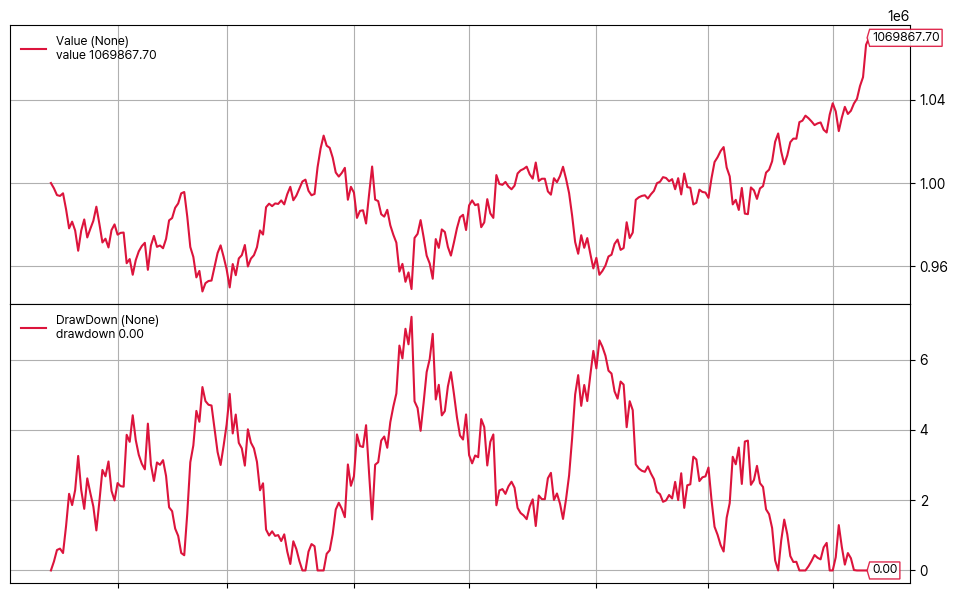

In [268]:
############################################################
# Backtesting Mean Variance Strategy
############################################################

assets = returns.columns.tolist()
weights = models['MV']
start = 1033

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [269]:
############################################################
# Show Mean Variance Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 7.22%
CAGR: 1.28%
Sharpe: 0.233


array([<Axes: ylabel='1270'>], dtype=object)

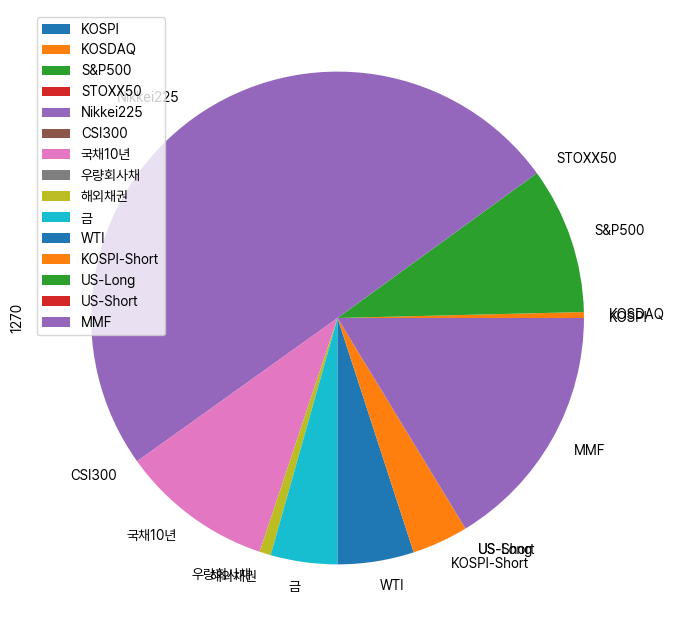

In [270]:
############################################################
# Plotting the composition of the last MV portfolio
############################################################

w = pd.DataFrame(models['MV'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [299]:
############################################################
# Composition per Asset
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes.rename(columns={1270 : 'Weights'}, inplace=True)
w_classes = w_classes.sort_values('Industry')
w_classes

,Industry,Weights
국채10년,Bond,10.0000%
우량회사채,Bond,0.0000%
해외채권,Bond,0.7469%
WTI,COM,5.0000%
금,COM,4.3738%
MMF,Cash,16.3067%
KOSDAQ,DS,0.3846%
KOSPI,DS,0.0000%
CSI300,FS,0.0000%
Nikkei225,FS,49.8793%


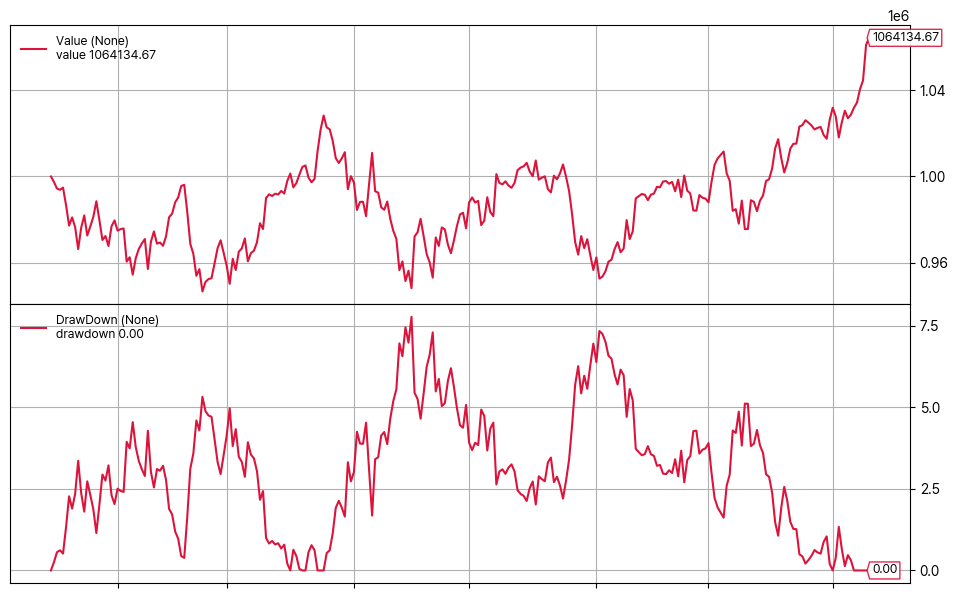

In [300]:
############################################################
# Backtesting Mean CVaR Strategy
############################################################

assets = returns.columns.tolist()
weights = models['CVaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [301]:
############################################################
# Show CVaR Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 7.77%
CAGR: 1.18%
Sharpe: 0.219


array([<Axes: ylabel='1270'>], dtype=object)

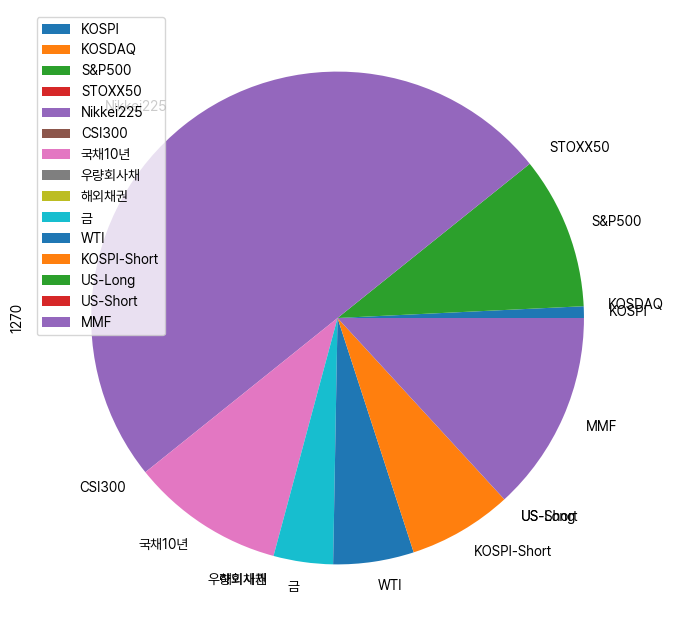

In [302]:
############################################################
# Plotting the composition of the last CVaR portfolio
############################################################

w = pd.DataFrame(models['CVaR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [303]:
############################################################
# Composition per Asset
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes.rename(columns={1270 : 'Weights'}, inplace=True)
w_classes = w_classes.sort_values('Industry')
w_classes

,Industry,Weights
국채10년,Bond,10.0537%
우량회사채,Bond,0.0000%
해외채권,Bond,0.0000%
WTI,COM,5.2869%
금,COM,3.8978%
MMF,Cash,13.1647%
KOSDAQ,DS,0.0000%
KOSPI,DS,0.7616%
CSI300,FS,0.0000%
Nikkei225,FS,50.0000%


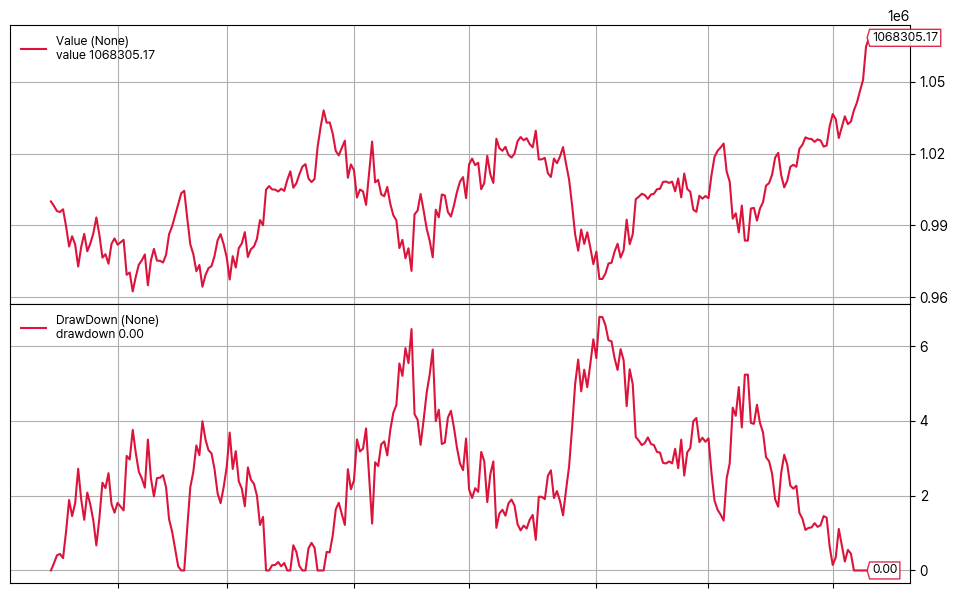

In [304]:
############################################################
# Backtesting Mean Worst Realization Strategy
############################################################

assets = returns.columns.tolist()
weights = models['WR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [305]:
############################################################
# Show Worst Realization Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 6.79%
CAGR: 1.25%
Sharpe: 0.274


array([<Axes: ylabel='1270'>], dtype=object)

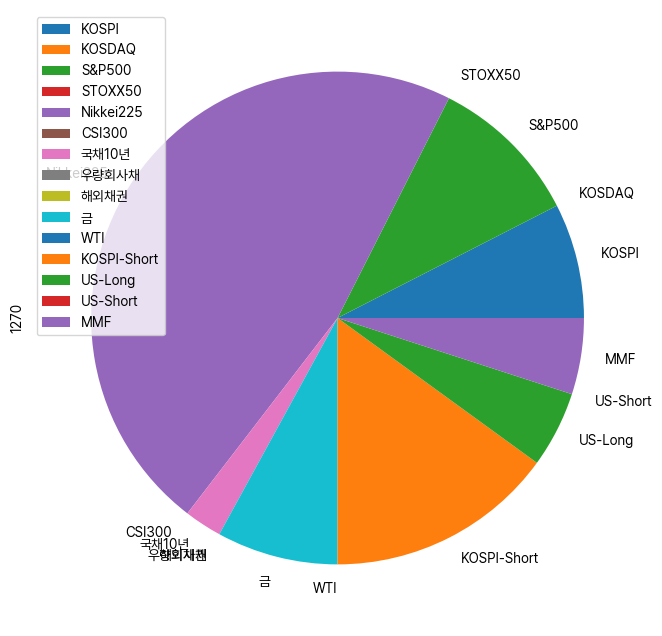

In [306]:
############################################################
# Plotting the composition of the last WR portfolio
############################################################

w = pd.DataFrame(models['WR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean WR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [308]:
############################################################
# Composition per Asset
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes.rename(columns={1270 : 'Weights'}, inplace=True)
w_classes = w_classes.sort_values('Industry')
w_classes

,Industry,Weights
국채10년,Bond,2.4672%
우량회사채,Bond,0.0000%
해외채권,Bond,0.0000%
WTI,COM,0.0000%
금,COM,7.9631%
MMF,Cash,5.0000%
KOSDAQ,DS,0.0000%
KOSPI,DS,7.5328%
CSI300,FS,0.0000%
Nikkei225,FS,47.0369%


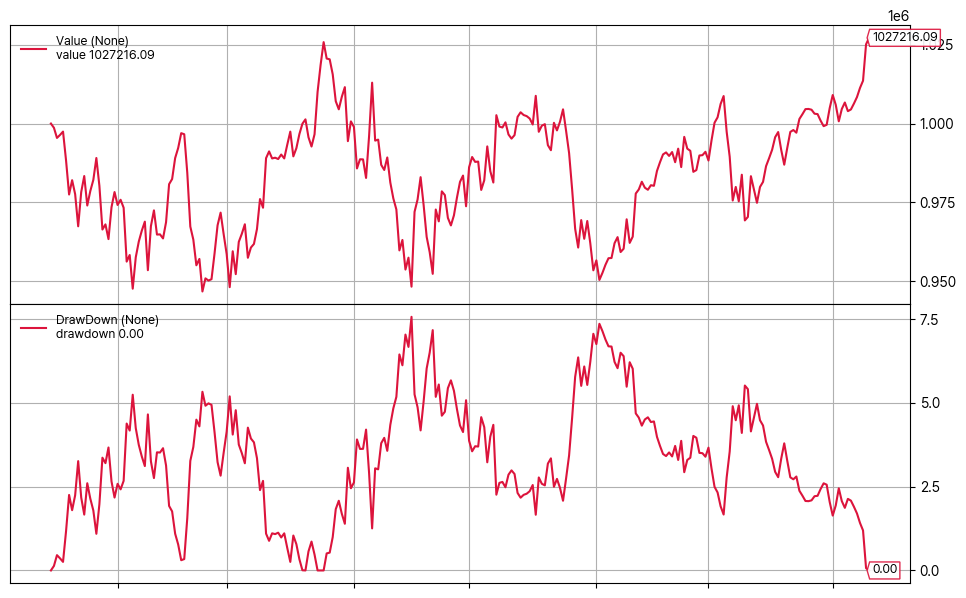

In [309]:
############################################################
# Backtesting Mean CDaR Strategy
############################################################

assets = returns.columns.tolist()
weights = models['CDaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [310]:
############################################################
# Show CDaR Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 7.57%
CAGR: 0.50%
Sharpe: 0.127


array([<Axes: ylabel='1270'>], dtype=object)

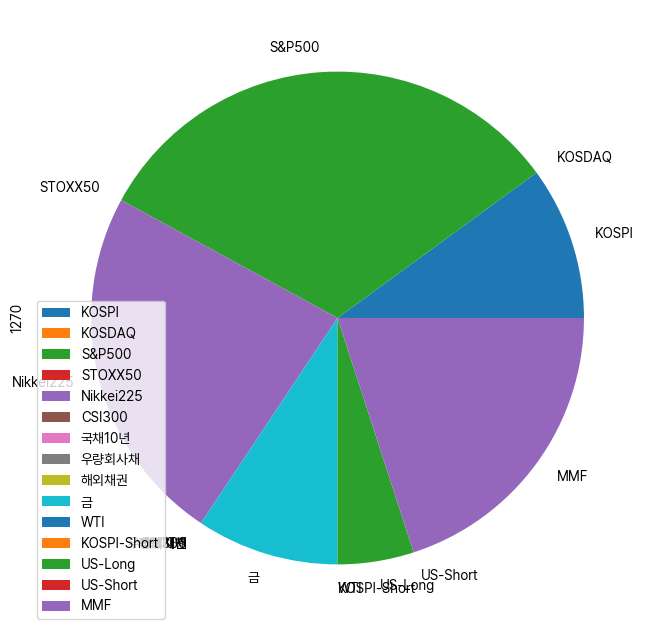

In [311]:
############################################################
# Plotting the composition of the last CDaR portfolio
############################################################

w = pd.DataFrame(models['CDaR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean CDaR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [312]:
############################################################
# Composition per Asset
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes.rename(columns={1270 : 'Weights'}, inplace=True)
w_classes = w_classes.sort_values('Industry')
w_classes

,Industry,Weights
국채10년,Bond,0.0000%
우량회사채,Bond,0.0000%
해외채권,Bond,0.0000%
WTI,COM,0.0000%
금,COM,9.3511%
MMF,Cash,20.0000%
KOSDAQ,DS,0.0000%
KOSPI,DS,10.0397%
CSI300,FS,0.0000%
Nikkei225,FS,23.5919%


## 4. Conclusion

In this example, the best strategy in terms of performance is __WR__ . The ranking of strategies in base of performance follows:

1. WR (7.03%): Worst Scenario or Minimax Model.
1. SPY (6.53%): Buy and Hold SPY.
1. CVaR (5.73%): Conditional Value at Risk.
1. MV (5.68%): Mean Variance.
1. CDaR (4.60%): Conditional Drawdown at Risk.

On the other hand, the best strategy in terms of Sharpe Ratio is __MV__ . The ranking of strategies in base of Sharpe Ratio follows:

1. MV (0.701): Mean Variance.
1. CVaR (0.694): Conditional Value at Risk.
1. WR (0.681): Worst Scenario or Minimax Model.
1. SPY (0.679): Buy and Hold SPY.
1. CDaR (0.622): Conditional Drawdown at Risk.